<a href="https://colab.research.google.com/github/cleysonl/ML_Bootcamp_CLL/blob/master/Supervised_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression**

Will be working with a data set based on housing prices in Ames, Iowa.

In [0]:
# Import the libraries
import numpy as np
import pandas as pd

In [2]:
# import the data using the file path
data = pd.read_csv('https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/master/Module%2004%20-%20Supervised%20ML%20-%20Regression/data/Ames_Housing_Sales.csv')
data.shape

(1379, 80)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
1stFlrSF         1379 non-null float64
2ndFlrSF         1379 non-null float64
3SsnPorch        1379 non-null float64
Alley            1379 non-null object
BedroomAbvGr     1379 non-null int64
BldgType         1379 non-null object
BsmtCond         1379 non-null object
BsmtExposure     1379 non-null object
BsmtFinSF1       1379 non-null float64
BsmtFinSF2       1379 non-null float64
BsmtFinType1     1379 non-null object
BsmtFinType2     1379 non-null object
BsmtFullBath     1379 non-null int64
BsmtHalfBath     1379 non-null int64
BsmtQual         1379 non-null object
BsmtUnfSF        1379 non-null float64
CentralAir       1379 non-null object
Condition1       1379 non-null object
Condition2       1379 non-null object
Electrical       1379 non-null object
EnclosedPorch    1379 non-null float64
ExterCond        1379 non-null object
ExterQual        1379 non-null object
Exterior1st    

In [4]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

## **Processing the data**

In [5]:
# Select the object (string) columns
cat_mask = data.dtypes == np.object
cat_mask

1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
WoodDeckSF      False
YearBuilt       False
YearRemodAdd    False
YrSold          False
SalePrice       False
Length: 80, dtype: bool

In [6]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1,0,Gd,150.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2,TA,RFn,TA,Attchd,2003.0,1710.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450.0,Inside,65.0,Reg,0.0,60,RL,196.0,BrkFace,None,0.0,2,CollgCr,61.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0,1,Gd,284.0,Y,Feedr,Norm,SBrkr,0.0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2,TA,RFn,TA,Attchd,1976.0,1262.0,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600.0,FR2,80.0,Reg,0.0,20,RL,0.0,None,None,0.0,5,Veenker,0.0,8,6,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1,0,Gd,434.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2,TA,RFn,TA,Attchd,2001.0,1786.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250.0,Inside,68.0,IR1,0.0,60,RL,162.0,BrkFace,None,0.0,9,CollgCr,42.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1,0,TA,540.0,Y,Norm,Norm,SBrkr,272.0,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3,TA,Unf,TA,Detchd,1998.0,1717.0,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550.0,Corner,60.0,IR1,0.0,70,RL,0.0,None,None,0.0,2,Crawfor,35.0,5,7,Y,0.0,None,CompShg,Gable,Abnorml,WD,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1,0,Gd,490.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3,TA,RFn,TA,Attchd,2000.0,2198.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260.0,FR2,84.0,IR1,0.0,60,RL,350.0,BrkFace,None,0.0,12,NoRidge,84.0,5,8,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [7]:
# List of categorical variables in data
categorical_cols = data.columns[cat_mask]
categorical_cols, categorical_cols.shape

(Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
        'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
        'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
        'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
        'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
        'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
        'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
        'SaleType', 'Street', 'Utilities'],
       dtype='object'), (43,))

In [8]:
# Encode the categorical variables
"""
For encoding the string categoricals, use either LabelEncoder or DictVectorizer
or Pandas get_dummies()

"""
numeric_cols = data.columns[~cat_mask]
numeric_data = data[numeric_cols]
categorical_data = data[categorical_cols]

numeric_data.shape, categorical_data.shape

((1379, 37), (1379, 43))

In [9]:
numeric_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,0,2,548.0,2,2003.0,1710.0,1,1,8450.0,65.0,0.0,60,196.0,0.0,2,61.0,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,1,2,460.0,2,1976.0,1262.0,0,1,9600.0,80.0,0.0,20,0.0,0.0,5,0.0,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,1,2,608.0,2,2001.0,1786.0,1,1,11250.0,68.0,0.0,60,162.0,0.0,9,42.0,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,1,1,642.0,3,1998.0,1717.0,0,1,9550.0,60.0,0.0,70,0.0,0.0,2,35.0,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,1,2,836.0,3,2000.0,2198.0,1,1,14260.0,84.0,0.0,60,350.0,0.0,12,84.0,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0


In [10]:
categorical_data.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,None,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,None,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,None,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub


### **One-hot encoding**

In [11]:
categorical_data_ohe = pd.get_dummies(categorical_data)
categorical_data_ohe.shape

(1379, 258)

In [12]:
categorical_data_ohe.head()

,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,...,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


### **Label Encoding**

In [13]:
categorical_data.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,None,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,None,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,None,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,None,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub


In [14]:
categorical_data_le = categorical_data.astype('category').apply(lambda x: x.cat.codes)
categorical_data_le.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1,0,3,3,2,6,2,1,2,2,4,3,2,11,13,4,3,2,6,4,1,4,1,1,0,5,2,3,0,4,3,3,1,1,5,2,3,1,1,4,8,1,0
1,1,0,3,1,0,6,2,1,1,2,4,3,3,7,8,4,5,1,6,4,1,4,1,1,0,2,3,3,0,2,3,3,2,1,24,2,3,1,1,4,8,1,0
2,1,0,3,2,2,6,2,1,2,2,4,3,2,11,13,4,5,2,6,4,1,4,1,1,0,5,2,3,0,4,0,3,1,1,5,2,3,1,1,4,8,1,0
3,1,0,1,3,0,6,4,1,2,2,4,3,3,12,15,4,2,0,6,4,2,4,5,1,2,5,2,3,0,0,0,3,2,1,6,2,3,1,1,0,8,1,0
4,1,0,3,0,2,6,2,1,2,2,4,3,2,11,13,4,5,2,6,4,1,4,1,1,0,5,2,3,0,2,0,3,1,1,15,2,3,1,1,4,8,1,0


**Create to datasets, one with one hot encoder and other with only labels encoders**



In [15]:
new_data_ohe = pd.concat([numeric_data, categorical_data_ohe], axis=1)
new_data_ohe.shape

(1379, 295)

In [16]:
new_data_le = pd.concat([numeric_data, categorical_data_le], axis=1)
new_data_le.shape

(1379, 80)

## **Training the model and fitting it to the test data**

In [17]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

#Split the data that is not one-hot encoded
feature_cols = [x for x in new_data_le.columns if x != y_col]
X_data = new_data_le[feature_cols]
y_data = new_data_le[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Split the data that is one-hot encoded
feature_cols = [x for x in new_data_ohe.columns if x != y_col]
X_data_ohc = new_data_ohe[feature_cols]
y_data_ohc = new_data_ohe[y_col] 

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, test_size=0.3, random_state=42)

print("No one hot encoded data dims:", X_train.shape, X_test.shape)
print("One hot encoded data dims:", X_train_ohc.shape, X_test_ohc.shape)

No one hot encoded data dims: (965, 79) (414, 79)
One hot encoded data dims: (965, 294) (414, 294)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Storage for error values
error_df = list()

# Data that has not been one-hot encoded
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test': mean_squared_error(y_test, y_test_pred)},
                          name = 'not one-hot enc'))

# Data that has been one-hot encoded
lr = LinearRegression()
lr.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = lr.predict(X_train_ohc)
y_test_ohc_pred = lr.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test': mean_squared_error(y_test_ohc, y_test_ohc_pred)},
                          name = 'one-hot enc'))

#Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,not one-hot enc,one-hot enc
train,7.534089e+08,3.177271e+08
test,2.652657e+09,2.463435e+16


### **Scaling the data**

In [0]:
#mute the setting with a copy warnings
pd.options.mode.chained_assignment = None

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {'not_encoded': (X_train, y_train, X_test, y_test),
                      'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}

#Get the list of float columns, and the float data so that we don't scale something we already scaled
mask = X_train.dtypes ==np.float
float_columns = X_train.columns[mask]

#initialize model
lr = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
  for scaler_label, scaler in scalers.items():
    trainingset = _X_train.copy() # copy because we dont want to scale this more than once
    testset = _X_test.copy()
    trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
    testset[float_columns] = scaler.transform(testset[float_columns])
    lr.fit(trainingset, _y_train)
    predictions = lr.predict(testset)
    key = encoding_label + ' - ' + scaler_label + 'scaling'
    errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
  print(key, error_val)

not_encoded - standardscaling        2.652657e+09
not_encoded - minmaxscaling          2.654174e+09
not_encoded - maxabsscaling          2.652558e+09
one_hot_encoded - standardscaling    4.872797e+25
one_hot_encoded - minmaxscaling      8.065328e+09
one_hot_encoded - maxabsscaling      8.065328e+09
--------------------------------------------------------------------------------
not_encoded - standardscaling 2652656875.086794
not_encoded - minmaxscaling 2654173540.749941
not_encoded - maxabsscaling 2652558065.0839524
one_hot_encoded - standardscaling 4.8727971966743205e+25
one_hot_encoded - minmaxscaling 8065327607.360269
one_hot_encoded - maxabsscaling 8065327607.199716


### **Plot of results**

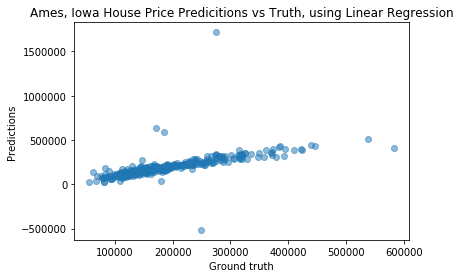

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ss = StandardScaler()
# mask gives True for columns with float format and False for the others
mask = X_train_ohc.dtypes == np.float
float_columns = X_train_ohc.columns[mask]
trainingset = X_train_ohc.copy()
testset = X_test_ohc.copy()
trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
testset[float_columns] = scaler.transform(testset[float_columns])
lr.fit(trainingset, _y_train)
y_test_pred = lr.predict(testset)

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth',
       ylabel= 'Predictions',
       title= 'Ames, Iowa House Price Predicitions vs Truth, using Linear Regression');

## **Tree Based Regression**

In [31]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [32]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
print(cross_val_score(lr, X=X_train_ohc, y=y_train_ohc, cv=5))
print(cross_val_score(dt, X=X_train_ohc, y=y_train_ohc, cv=5))

[-1.12335332e+10 -5.18426485e+08 -5.83478113e+06 -3.23515209e+08
 -2.64932489e+07]
[0.69861771 0.77331025 0.58199388 0.81653434 0.5817916 ]
